<a href="https://colab.research.google.com/github/Ngom/My_Codes_Dsti/blob/main/ANN_practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

In [36]:
# authentitiate to acces to colab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
%cd 

/root


In [38]:
# read and upload the data
dataset = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [39]:
# view column names
print(dataset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [40]:
# view the inxes
print(dataset.index)

RangeIndex(start=0, stop=10000, step=1)


In [41]:
# Not all independent variables are not important for analysis such as RowNumber, CustomerID or Surname
x = dataset.iloc[:, 3:13].values # consider data from column 3
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [42]:
# get the labels
y = dataset.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [43]:
# another to get label
z = dataset['Exited']
z

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [44]:
############################## DATA ENCODING ###################################
# We have to encode categorical data such as Geography and Gender.

#ORDINAL ENCODING : way 1
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
X_ord_1 = dataset.iloc[:, 3:13].values # get the data in new varible name
LabelEncoder_X = LabelEncoder()       # instanciate an object of the LabelEncoder
X_ord_1[:,1] = LabelEncoder_X.fit_transform(X_ord_1[:,1]) # ordinal encoding for column 1
X_ord_1[:,2] = LabelEncoder_X.fit_transform(X_ord_1[:,2]) # ordinal encoding for column 2
X_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [45]:
# ORDINAL ENCODING - way 2 
# problem or bug : it sets all to zero
# import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder_1 = OrdinalEncoder()   # instanciate an object of the LabelEncoder
X_ord_2 = dataset.iloc[:, 3:13].values # get the data in new varible name
X_ord_2[:, 1] = ordinal_encoder_1.fit_transform([X_ord_2[:, 1]]) # ordinal encoding for column 1
X_ord_2[:, 2] = ordinal_encoder_1.fit_transform([X_ord_2[:, 2]]) # ordinal encoding for column 1
X_ord_2

array([[619, 0.0, 0.0, ..., 1, 1, 101348.88],
       [608, 0.0, 0.0, ..., 0, 1, 112542.58],
       [502, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [709, 0.0, 0.0, ..., 0, 1, 42085.58],
       [772, 0.0, 0.0, ..., 1, 0, 92888.52],
       [792, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [46]:
X = X_ord_1

In [47]:
######################################## ONE-HOT ENCODING ########################################
# Way 1: using data values 
from sklearn.preprocessing import OneHotEncoder # import OneHot Encoder
from sklearn.compose import ColumnTransformer   # get the Column Transformer
import numpy as np

ct = ColumnTransformer(                  # 'encoder' is the name of the column transformer
    [('encoder', OneHotEncoder(), [1])], # the column numbers to be transformed (here [1] but can be like [1,2,3]) 
    remainder='passthrough'              # leave the rest rest untouch
)
# get transformed data
X = np.array(ct.fit_transform(X), dtype=int) #Note: The X matrix should be ordinally encoded (with ordinal encoding applied to it)
# convert data to data frame
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101348
1,0,0,1,608,0,41,1,83807,1,0,1,112542
2,1,0,0,502,0,42,8,159660,3,1,0,113931
3,1,0,0,699,0,39,1,0,2,0,0,93826
4,0,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270
9996,1,0,0,516,1,35,10,57369,1,1,1,101699
9997,1,0,0,709,0,36,7,0,1,0,1,42085
9998,0,1,0,772,1,42,3,75075,2,1,0,92888


In [48]:
# we remove the first column to avoid the dummy data drap
X = X[:, 1:]
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101348
1,0,1,608,0,41,1,83807,1,0,1,112542
2,0,0,502,0,42,8,159660,3,1,0,113931
3,0,0,699,0,39,1,0,2,0,0,93826
4,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270
9996,0,0,516,1,35,10,57369,1,1,1,101699
9997,0,0,709,0,36,7,0,1,0,1,42085
9998,1,0,772,1,42,3,75075,2,1,0,92888


In [49]:
# get prefix module from sys library
#from sys import prefix

# ONE ENCODING way 2 : Unsing data frame
X_df = dataset.iloc[:, 3:13]
X_df = pd.concat([X_df, pd.get_dummies(X_df['Geography'], prefix='country', drop_first=True)], axis=1) # grops the first column
# axis=1 means contenate along the the column (put column beside another)
X_df.drop(['Geography'], axis=1, inplace=True) # get rig of the original column
X_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0


# Split the data into training and testing sets
- 80% train
- 20% test

In [50]:
from sklearn.model_selection import train_test_split # import spliter from sklearn
# We use random_state when splitting to be sure having same data at each time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [51]:
# Standardize train and test (x_standardized = (x - mean)/std_dev)
from sklearn.preprocessing import StandardScaler # get Standardise scaler
# instiate the sclaer
sc = StandardScaler()
# transform x train
X_train = sc.fit_transform(X_train)
# transform x test with the sacler of x train
X_test = sc.transform(X_test) # transform instead of fit_trans
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.714901,-0.572731,-0.230820,0.915091,-0.944500,-0.701742,0.588164,0.802257,-1.553374,0.977259,0.427402
1,-0.583124,-0.572731,-0.251509,-1.092788,-0.944500,-0.355203,0.469851,0.802257,-1.553374,-1.023271,-1.025493
2,1.714901,-0.572731,-0.396330,-1.092788,0.774987,0.337876,0.858782,-0.911510,0.643760,0.977259,-0.944793
3,1.714901,-0.572731,-0.044622,-1.092788,1.252622,0.337876,0.565605,0.802257,-1.553374,0.977259,-0.551941
4,-0.583124,1.746019,0.658795,0.915091,-0.562392,1.030954,0.730400,-0.911510,-1.553374,-1.023271,1.083388


# Build the model

In [52]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [53]:
# create the model
model = keras.Sequential()
# add first hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
# add second hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
# add the output layer
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# sigmoid for binary on the ouptut layer
# sotfmax for multiclass on the output layer

In [54]:
# compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# train the model
history = model.fit(X_train, y_train, batch_size=10,epochs=200, verbose=2)

Epoch 1/200
800/800 - 2s - loss: 0.4852 - accuracy: 0.7972 - 2s/epoch - 2ms/step
Epoch 2/200
800/800 - 1s - loss: 0.4282 - accuracy: 0.7972 - 1s/epoch - 1ms/step
Epoch 3/200
800/800 - 1s - loss: 0.4202 - accuracy: 0.8114 - 1s/epoch - 1ms/step
Epoch 4/200
800/800 - 1s - loss: 0.4129 - accuracy: 0.8331 - 973ms/epoch - 1ms/step
Epoch 5/200
800/800 - 1s - loss: 0.4086 - accuracy: 0.8341 - 960ms/epoch - 1ms/step
Epoch 6/200
800/800 - 1s - loss: 0.4052 - accuracy: 0.8336 - 939ms/epoch - 1ms/step
Epoch 7/200
800/800 - 1s - loss: 0.4034 - accuracy: 0.8370 - 932ms/epoch - 1ms/step
Epoch 8/200
800/800 - 1s - loss: 0.4014 - accuracy: 0.8370 - 962ms/epoch - 1ms/step
Epoch 9/200
800/800 - 1s - loss: 0.4004 - accuracy: 0.8375 - 974ms/epoch - 1ms/step
Epoch 10/200
800/800 - 1s - loss: 0.3995 - accuracy: 0.8372 - 1s/epoch - 1ms/step
Epoch 11/200
800/800 - 1s - loss: 0.3982 - accuracy: 0.8381 - 977ms/epoch - 1ms/step
Epoch 12/200
800/800 - 1s - loss: 0.3980 - accuracy: 0.8375 - 943ms/epoch - 1ms/step
E

In [56]:
# show details
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (10, 6)                   72        
                                                                 
 dense_7 (Dense)             (10, 6)                   42        
                                                                 
 dense_8 (Dense)             (10, 1)                   7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [57]:
# evaluate the model
model_loss, model_acc = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8620


In [58]:
model_loss

0.3290959298610687

In [59]:
model_acc

0.8619999885559082

In [76]:
# inference: predict now 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [79]:
# convert y_pred to 0-1 values using astype() method
y_pred = y_pred.astype(int) 
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [61]:
# Predicti using the info of new customer
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer = sc.fit_transform(new_customer)
new_pred = model.predict(new_customer)
new_pred = (new_pred > 0.5)
print(new_pred)

[[False]]


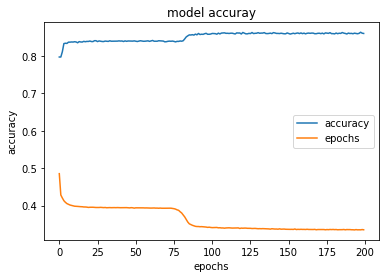

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuray')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'epochs'])
plt.show()

In [64]:
# An alternative to using train_test_split is to specify a validation_split ration
from traitlets.traitlets import validate
from sklearn.preprocessing import StandardScaler
# Standardize
sc = StandardScaler()
X = sc.fit_transform(X)
# train
history = model.fit(X, y,                   # X_standardize direct here
                    verbose=1,
                    validation_split = 0.2, # split at 80% - 20%
                    epochs=200,
                    batch_size=10
                   )
#Note: do not perform better than the first method of splitting !

Epoch 1/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.8624 - val_loss: 0.3431 - val_accuracy: 0.8605
Epoch 2/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3312 - accuracy: 0.8627 - val_loss: 0.3447 - val_accuracy: 0.8575
Epoch 3/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3314 - accuracy: 0.8611 - val_loss: 0.3453 - val_accuracy: 0.8605
Epoch 4/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3313 - accuracy: 0.8631 - val_loss: 0.3458 - val_accuracy: 0.8580
Epoch 5/200
800/800 [==============================] - 2s 3ms/step - loss: 0.3314 - accuracy: 0.8633 - val_loss: 0.3441 - val_accuracy: 0.8600
Epoch 6/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.8622 - val_loss: 0.3491 - val_accuracy: 0.8570
Epoch 7/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3316 - accuracy: 0.8595 - val_loss: 0.3450 - val_accuracy: 0.8600

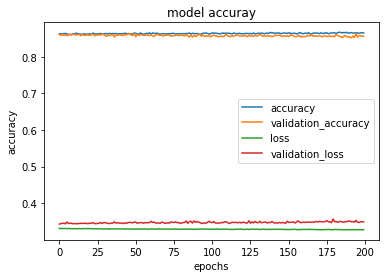

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation_accuracy','loss','validation_loss'])
plt.title('model accuray')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [66]:
# save your model to use later
model.save('/content/drive/MyDrive/churn_model.h5')

# Plotting the confusion matrix

In [77]:
# tensorflow confusion matrix of the model
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

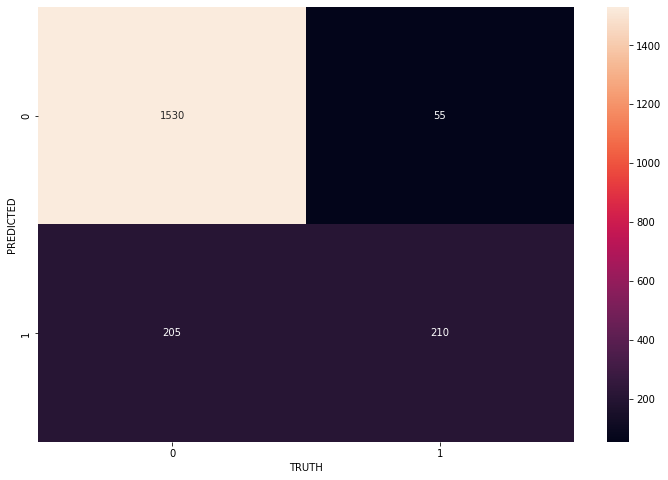

In [80]:
import seaborn as sn
import matplotlib.pyplot as plt
# plot the confusion matrix using heatmap() method from seaborn
plt.figure(figsize=(12,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('PREDICTED')
plt.xlabel('TRUTH')
plt.show()